<a href="https://colab.research.google.com/github/IKJHGF/assignment__arguments/blob/main/shark_attack_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%reload_ext google.colab.data_table

path='/content/drive/MyDrive/attacks.csv'
df=pd.read_csv(path, encoding='ISO-8859-1')
df

Case Number         Date    Year        Type    Country  \
0      2018.06.25  25-Jun-2018  2018.0     Boating        USA   
1      2018.06.18  18-Jun-2018  2018.0  Unprovoked        USA   
2      2018.06.09  09-Jun-2018  2018.0     Invalid        USA   
3      2018.06.08  08-Jun-2018  2018.0  Unprovoked  AUSTRALIA   
4      2018.06.04  04-Jun-2018  2018.0    Provoked     MEXICO   
...           ...          ...     ...         ...        ...   
25718         NaN          NaN     NaN         NaN        NaN   
25719         NaN          NaN     NaN         NaN        NaN   
25720         NaN          NaN     NaN         NaN        NaN   
25721         NaN          NaN     NaN         NaN        NaN   
25722          xx          NaN     NaN         NaN        NaN   

                  Area                        Location     Activity  \
0           California     Oceanside, San Diego County     Paddling   
1              Georgia  St. Simon Island, Glynn County     Standing   
2               Hawaii                    Habush, Oahu      Surfing   
3      New South Wales              Arrawarra Headland      Surfing   
4               Colima                        La Ticla  Free diving   
...                ...                             ...          ...   
25718              NaN                             NaN          NaN   
25719              NaN                             NaN          NaN   
25720              NaN                             NaN          NaN   
25721              NaN                             NaN          NaN   
25722              NaN                             NaN          NaN   

                  Name Sex   ...         Species   \
0          Julie Wolfe    F  ...      White shark   
1      Adyson McNeely     F  ...              NaN   
2          John Denges    M  ...              NaN   
3                 male    M  ...        2 m shark   
4       Gustavo Ramos     M  ...  Tiger shark, 3m   
...                ...  ...  ...              ...   
25718              NaN  NaN  ...              NaN   
25719              NaN  NaN  ...              NaN   
25720              NaN  NaN  ...              NaN   
25721              NaN  NaN  ...              NaN   
25722              NaN  NaN  ...              NaN   

               Investigator or Source                       pdf  \
0                    R. Collier, GSAF      2018.06.25-Wolfe.pdf   
1      K.McMurray, TrackingSharks.com    2018.06.18-McNeely.pdf   
2      K.McMurray, TrackingSharks.com     2018.06.09-Denges.pdf   
3                      B. Myatt, GSAF  2018.06.08-Arrawarra.pdf   
4                           A .Kipper      2018.06.04-Ramos.pdf   
...                               ...                       ...   
25718                             NaN                       NaN   
25719                             NaN                       NaN   
25720                             NaN                       NaN   
25721                             NaN                       NaN   
25722                             NaN                       NaN   

                                            href formula  \
0      http://sharkattackfile.net/spreadsheets/pdf_di...   
1      http://sharkattackfile.net/spreadsheets/pdf_di...   
2      http://sharkattackfile.net/spreadsheets/pdf_di...   
3      http://sharkattackfile.net/spreadsheets/pdf_di...   
4      http://sharkattackfile.net/spreadsheets/pdf_di...   
...                                                  ...   
25718                                                NaN   
25719                                                NaN   
25720                                                NaN   
25721                                                NaN   
25722                                                NaN   

                                                    href Case Number.1  \
0      http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.25   
1      http://sharkattackfile.net/spreadsheets/pdf_di...    2

In [73]:
df_copy = df.copy()

In [74]:
# 4. Are certain activities more likely to result in a shark attack?
df1 = df_copy.drop(columns= ['Date', 'Case Number', 'Name', 'Age', 'Type', 'Species ', 'Injury', 'Year', 'Country', 'Area', 'Location', 'Sex ', 'Time', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']) # drop colums that are not essential for question 4
df1 #show reduced table

Activity Fatal (Y/N)
0         Paddling           N
1         Standing           N
2          Surfing           N
3          Surfing           N
4      Free diving           N
...            ...         ...
25718          NaN         NaN
25719          NaN         NaN
25720          NaN         NaN
25721          NaN         NaN
25722          NaN         NaN

[25723 rows x 2 columns]

In [75]:
df2 = df1.dropna(how='all') # drop rows with only missing (NaN) values
df2

Activity Fatal (Y/N)
0         Paddling           N
1         Standing           N
2          Surfing           N
3          Surfing           N
4      Free diving           N
...            ...         ...
6297        Diving           Y
6298  Pearl diving           Y
6299      Swimming           Y
6300           NaN           Y
6301      Swimming           Y

[6177 rows x 2 columns]

In [76]:
df3 = df2.rename(columns={'Fatal (Y/N)': 'Fatal'}) # rename colum with long title and spaces
df3

Activity Fatal
0         Paddling     N
1         Standing     N
2          Surfing     N
3          Surfing     N
4      Free diving     N
...            ...   ...
6297        Diving     Y
6298  Pearl diving     Y
6299      Swimming     Y
6300           NaN     Y
6301      Swimming     Y

[6177 rows x 2 columns]

In [77]:
print(df3['Fatal'].unique()) # show all unique values in column 'Fatal' (it should be Y(es() or N(o)) or nan)

['N' 'Y' nan 'M' 'UNKNOWN' '2017' ' N' 'N ' 'y']


In [78]:
replace_values_1 = {' N' : 'N', 'N ' : 'N', 'y' : 'Y','nan': np.NaN, 'M': np.NaN, 'UNKNOWN': np.NaN, '2017': np.NaN} # replace values in column Fatal to end up with only Y, N and nan 
df4 = df3.replace({'Fatal': replace_values_1})
df4

Activity Fatal
0         Paddling     N
1         Standing     N
2          Surfing     N
3          Surfing     N
4      Free diving     N
...            ...   ...
6297        Diving     Y
6298  Pearl diving     Y
6299      Swimming     Y
6300           NaN     Y
6301      Swimming     Y

[6177 rows x 2 columns]

In [79]:
print(df4['Fatal'].unique()) # show all unique values in column 'Fatal' (it should be Y(es() or N(o)) or nan)

['N' 'Y' nan]


In [80]:
print(df4['Activity'].unique()) # show all unique values in column 'Activity'
df4['Activity'].nunique() # count all unique values there are in column 'Activity'

['Paddling' 'Standing' 'Surfing' ...
 'Crew swimming alongside their anchored ship' '4 men were bathing'
 'Wreck of  large double sailing canoe']


1532

In [81]:
replace_values_2 = {'.': np.NaN, '': np.NaN} # replace 'empty' values in column Fatal to end up with only Y, N and nan 
df5 = df4.replace({'Fatal': replace_values_2})
df5

Activity Fatal
0         Paddling     N
1         Standing     N
2          Surfing     N
3          Surfing     N
4      Free diving     N
...            ...   ...
6297        Diving     Y
6298  Pearl diving     Y
6299      Swimming     Y
6300           NaN     Y
6301      Swimming     Y

[6177 rows x 2 columns]

In [82]:
df6 = df5[df5['Fatal'].notna()] # drop rows with NaN values in column Fatal
df7 = df6[df6['Activity'].notna()] # drop rows with NaN values in column Activity
df7

Activity Fatal
0         Paddling     N
1         Standing     N
2          Surfing     N
3          Surfing     N
4      Free diving     N
...            ...   ...
6296      Swimming     Y
6297        Diving     Y
6298  Pearl diving     Y
6299      Swimming     Y
6301      Swimming     Y

[5306 rows x 2 columns]

In [83]:
activity_types = df7['Activity'].value_counts().nlargest(25) # show top 25 activities in shark attacks to humans
activity_types

Surfing            927
Swimming           773
Fishing            409
Spearfishing       305
Bathing            147
Wading             138
Diving             109
Standing            98
Snorkeling          87
Scuba diving        63
Body boarding       61
Body surfing        46
Swimming            41
Pearl diving        32
Kayaking            31
Treading water      30
Fell overboard      29
Free diving         26
Boogie boarding     25
Windsurfing         19
Boogie Boarding     16
Shark fishing       15
Walking             15
Floating            13
Surf skiing         12
Name: Activity, dtype: int64

#Assumptions to set a maximum of 15 different activities:
1. surfing (including windsurfing and kite surfing)
2. swimming (note: appears twice in top 25, including treading water (relatively small number of registrations))
3. fishing
4. spearfishing (kept separate because of distinct amount of registrations)
5. bathing
6. wading (kept separate because of fair amount of registrations)
7. diving (including pearl diving and scuba diving and free diving)
8. standing
9. snorkeling
10. body boarding (includes body surfing, boogie boarding, paddle boarding, SUP)
11. kayaking (including kayak fishing)
12. fell overboard
13. shark fishing (kept separate, interesting category because of theme!, also 'fidhing for sharks)
14. walking
15. floating

In [84]:
unclear_activity_1 = df7[df7['Activity'].str.contains(' or ', na=False, case=False)] # test > how many strings are there in column Activity that contain ' or '
unclear_activity_1

Activity Fatal
488                     Body surfing or Boogie boarding     N
748                         Swimming or boogie boarding     N
752                                  Wading or swimming     N
886                              Swimming or Snorkeling     Y
895                             Kayaking or Wave skiing     N
917                          Standing or boogie boardin     N
1225                                Swimming or surfing     N
1719                                Swimming or surfing     N
1731               Swimming to shore from boat or kayak     Y
1826                         Boogie boarding or Surfing     N
2133                      Body surfing or body boarding     N
2199                        Swimming or paddle boarding     N
2218                           Body boarding or surfing     N
2275                             Swimming or snorkeling     Y
2411     Commercial diver (submerged or treading water)     Y
2492                Paddling on surfboard or body board     N
2874                            Surfing or body surfing     N
4296                            Spearfishing or fishing     N
4360  Swimming or wading out  to warn bathers that a...     N
4500                Free diving or wading back to shore     N
4541                                 Bathing or washing     Y
4690                           Dog paddling or standing     Y
5058                           Bathing or body surfing      N
5184  Floating, after falling or jumping off the Sta...     N
5485                               Floating or standing     Y
5494                           Jumped or fell overboard     Y
5766   Fell or jumped overboard from the liner Rhynland     Y

In [85]:
replace_values_3 = {'Bathing or washing': 'Bathing', 'Body surfing or Boogie boarding': 'Body boarding', 'Swimming to shore from boat or kayak': 'Swimming', 'Body surfing or body boarding': 'Body boarding', 'Fell or jumped overboard from the liner Rhynland': 'Fell overboard', 'Floating, after falling or jumping off the Standard Oil tanker Frederick W. Weller': 'Fell overboard', 'Jumped or fell overboard': 'Fell overboard', 'Kayaking or Wave skiing': 'Kayaking', 'Paddling on surfboard or body board': 'Body boarding'}  
df8 = df7.replace({'Activity': replace_values_3})
df8
unclear_activity_2 = df8[df8['Activity'].str.contains(' or ', na=False, case=False)] # test > how many strings are there in column Activity that contain ' or '
unclear_activity_2

Activity Fatal
748                         Swimming or boogie boarding     N
752                                  Wading or swimming     N
886                              Swimming or Snorkeling     Y
917                          Standing or boogie boardin     N
1225                                Swimming or surfing     N
1719                                Swimming or surfing     N
1826                         Boogie boarding or Surfing     N
2199                        Swimming or paddle boarding     N
2218                           Body boarding or surfing     N
2275                             Swimming or snorkeling     Y
2411     Commercial diver (submerged or treading water)     Y
2874                            Surfing or body surfing     N
4296                            Spearfishing or fishing     N
4360  Swimming or wading out  to warn bathers that a...     N
4500                Free diving or wading back to shore     N
4690                           Dog paddling or standing     Y
5058                           Bathing or body surfing      N
5485                               Floating or standing     Y

In [86]:
df8.loc[df8['Activity'].str.contains(' or ', na=False, case=False), 'Activity'] = np.NaN # change all leftover unclear activities with ' or ' to Nan-values

In [87]:
#check if previous code worked
#unclear_activity_2 = df8[df8['Activity'].str.contains(' or ', na=False, case=False)] 
#unclear_activity_2

In [88]:
unclear_activity_3 = df8[df8['Activity'].str.contains('/', na=False, case=False)] # test > how many strings are there in column Activity that contain unclear activity with '/' (they might belong in two categories)
unclear_activity_3

Activity Fatal
55                     Fishing / Wading     N
71                   Kayaking / Fishing     N
105                  Kayaking / Fishing     N
328                   Swimming / Wading     N
441               Standing / Snorkeling     N
...                                 ...   ...
5784  Swimming / escaping imprisonment      Y
5893  Swimming / escaping imprisonment      N
5913                 Bathing / standing     N
5949                 Standing / Bathing     N
6184                          Swimming/     Y

[92 rows x 2 columns]

In [89]:
replace_values_4 = {'Diving / Filming': 'Diving', 'Free diving / Photographing pilot whales': 'Diving', 'Swimming / Whale Watching': 'Swimming', 'Spearfishing/ filming': 'Spearfishing', 'Swimming / treading water': 'Swimming', 'Swimming / jumping off a jetty': 'Swimming', 'Free diving / modeling': 'Diving', 'Diving / Kissing the shark': 'Diving', 'Wreck / Technical diving': 'Diving', 'Splashing / wading': 'Wading', 'Fishing / washing bait off hands': 'Fishing', 'Playing / standing': 'Standing', 'The Christie V sank on 11/6/1988, survivors were adrift on a dinghy': 'Fell overboard', 'Sea disaster, foundering of the cargo vessle M/V Dorolonda': 'Fell overboard', 'Scuba diving & U/W photography': 'Diving', 'Sinking of the M/V Mindoro during a typhoon': 'Fell overboard', 'Air/Sea Disaster Pan-American Airlines Stratocruiser with 44 people onboard crashed into the sea': 'Fell overboard', 'Air/Sea Disaster': 'Fell overboard', 'Free diving, working on U/W scenes for motion picture': 'Diving', 'Fishing / cleaning fish, dived into water to retrieve a lost fish': 'Fishing', 'Air/Sea Disaster involving C-54 Air Force Transport No. 2686 with 37 on board': 'Fell overboard', 'USS Gambier Bay CVE-73 shelled & sunk at 09h57 on 10/24/1944, by Japanes fleet enroute to attack the Allied landing force at Leyte.': 'Fell overboard', 'USS Hoel DD 533 sunk on 10/24/1944 in the Battle off Samar. 2 crewmen were swimmng alongside a floater net &': 'Fell overboard', 'USS Johnston DD 557 sunk on 10/24/1944 in the Battle off Samara. Crewmen were swimming beside a raft.': 'Fell overboard', '1446-ton Norwegian barque Errol, bound from Peru to Newcastle with 22 on board wrecked. Survivors shelterd on the wreck of the Annasona. Subsequently the Master, his wife & 4 children perished along with several crew. Survivors (5) were rescued 7/12/1909': 'Fell overboard', 'Swimming / escaping imprisonment': 'Swimming', 'Swimming / escaping imprisonment': 'Swimming', 'Swimming/': 'Swimming'}  
df9 = df8.replace({'Activity': replace_values_4})
df9
unclear_activity_4 = df9[df9['Activity'].str.contains('/', na=False, case=False)] # test > how many strings are left in column Activity that contain unclear activity with '/' (they might belong in two categories)
unclear_activity_4

Activity Fatal
55                     Fishing / Wading     N
71                   Kayaking / Fishing     N
105                  Kayaking / Fishing     N
328                   Swimming / Wading     N
441               Standing / Snorkeling     N
...                                 ...   ...
5654    Swimming / floating on his back     N
5784  Swimming / escaping imprisonment      Y
5893  Swimming / escaping imprisonment      N
5913                 Bathing / standing     N
5949                 Standing / Bathing     N

[67 rows x 2 columns]

In [90]:
df9.loc[df9['Activity'].str.contains('/', na=False, case=False), 'Activity'] = np.NaN # change all leftover unclear activities with '/' to Nan-values (they belong in two categories, therefore not reliable)

In [91]:
# check if code above worked 
# df9[df9['Activity'].str.contains('/', na=False, case=False)] 

In [92]:
unclear_activity_5 = df9[df9['Activity'].str.contains('&', na=False, case=False)] # test > how many strings are there in column Activity that contain unclear activity with '&' (they might belong in two categories)
unclear_activity_5

Activity Fatal
654                               Swimming & snorkeling     Y
694                           Fishing - 'tag & release'     N
1347        Floating near boat & observing bioluminesce     N
1650                          Diving & fishing with net     N
1673                         Free diving & spearfishing     N
...                                                 ...   ...
6149  Fell overboard from a frigate & was swallowed ...     N
6170  Man fell overboard from ship. Those on board t...     Y
6226  Skin diving. Grabbed shark's tail; shark turne...     N
6241  Fishing from a small boat & put his hand in th...     N
6243  Swimming in section of river used for washing ...     N

[144 rows x 2 columns]

In [93]:
replace_values_5 = {"Fishing - 'tag & release'": 'Fishing', 'Floating near boat & observing bioluminesce': 'Floating', 'Swimming, wearing black wetsuit & swim fins': 'Swimming', 'Walking, carrying surfboard & stepped on shark': 'Walking', 'Scallop diving (using surface-supplied air & a POD)': 'Diving', "Scallop diving (using surface-supplied air & a POD)": 'Diving', 'Surfing, fell off surfboard & stepped on the shark.': 'Surfing', 'Spearfishing & holding catch': 'Spearfishing', 'Spearfishing & diving for paua': 'Spearfishing', 'Spearfishing on scuba & transferring fish onto a stringer': 'Spearfishing', 'Ferry boat Dona Paz with 4431 passengers exploded & caught fire when she collided with an oil tanker': 'Fell overboard', '14 m prawn trawler New Venture capsized & sank in heavy seas Three people in the water': 'Fell overboard', 'Their 9 m launch was run down by a 25,000-ton Japanese freighter on the night of 3-11-1977 & they drifted, clinging to an icebox for 2 days': 'Fell overboard', 'Wading & pushing dinghy toward the shallows': 'Wading', 'The shrimper Loless Maurine capsized in heavy seas & the men were swimming ashore': 'Fell overboard', 'The passenger ship Pioneer Cebu capsized & sank in Typhoon Irma': 'Fell overboard', 'Jumped off surfboard & landed on the shark': 'Surfing', 'Scuba diving & filming': 'Diving', 	'Lying on surfboard & paddling': 'Surfing', 'Spearfishing using scuba & trailing a string of bleeding fish': 'Spearfishing', 'Ferry boat Dona Paz with 4431 passengers exploded & caught fire when she collided with an oil tanker': 'Fell overboard', 'Vessel caught fire & capsized, survivors in the water': 'Fell overboard', 'Fishing, fell from rocks & disappeared': 'Fishing', 'Bottom fishing for lingcod & had hooked a fish': 'Fishing', '14 m prawn trawler New Venture capsized & sank in heavy seas Three people in the water': 'Fell overboard', 'Surfing & dangling foot in water amid baitfish': 'Surfing', 'Fishing for snoek & yellowtail': 'Fishing', 'Diving & force-feeding the shark': 'Diving', '3.3 m fishing boat sank. Treveluwe & Peter Hodgson (wearing lifejackets) were drifting in the current': 'Fell overboard', 'Scuba diving & feeding fish': 'Diving', 'Wading & pushing dinghy toward the shallows': 'Wading', 'The shrimper Loless Maurine capsized in heavy seas & the men were swimming ashore': 'Fell overboard', 'The passenger ship Pioneer Cebu capsized & sank in Typhoon Irma': 'Fell overboard', 'Fishing (rod & line)': 'Fishing', 'Fishing with hand line tied to wrist & was pulled into the water': 'Fishing', 'Fishing for snappers & cleaning mullet. Put mullet over side of boat to wash it': 'Fishing', 'Free diving, surveying a pipeline & examing cathodes under jetty': 'Diving', 'Fishing, speared shark upset canoe & man fell in water': 'Fishing', 'Taking boat from California to Florida when it ran aground & he was swimming back to boat': 'Swimming', 'Fishing, when line became snagged on rock & he dived into water to free it': 'Fishing', 'Diving for shells, saw shark circling wife near the surface, intercepted shark & it pulled him beneath the water': 'Diving', 'Spearfishing, shot a sandtiger shark. Cord to spear tangled round his legs & a wave washed him onto a reef.': 'Spearfishing', 'Spearfishing, Smith & Walker touched shark with tip of their guns': 'Spearfishing', "Adrift, hanging onto cushion, after his 17' skiff ran out of gas & capsized 3 miles from shore": 'Fell overboard', 'Spearfishing with Joe Turner (24). Shark attracted to speared halibut on belt of one diver, tried to bite Ides speargun & he shot it in the mouth': 'Spearfishing', "U.S. Airforce C124 enroute from Hickham Air Base to Japan went down. The 3 survivors fashioned raft from mailbags & were rescued 3 days after the crash.": 'Fell overboard', 'Competing in spearfishing championship & towing dead fish': 'Spearfishing', '3 men & 2 boys picked up wearing life jackets and with inner tube': 'Fell overboard', 'Line fishing from Lakotoi, saw shoal of fish, dived overboard, had speared second fish & surfaced for air': 'Fishing', 'Spearfishing & lassoed shark': 'Spearfishing', 'Dived overboard & was swimming near stern of trawler': 'Swimming', 'American freighter Mormackite, bound from Buenos Aires for Baltimore, capsized & sank in heavy seas': 'Fell overboard', 'Royal Hawaiian skymaster DC-6B aircraft went down with 58 passenger & crew': 'Fell overboard', 'Swimming in midriver near sewage outlet & 400 m from a slaughterhouse': 'Swimming', '	Shipwrecked; adrift on raft for 2 days & 2 nights': 'Fell overboard', '2 messboys (Jeppsen) & Tony Latona (13) were playing on the afterdeck of the Danish ship Grete Maersk. Jeppsen fell overboard, Latona threw a lifebelt then jumped in to help him. Ship didnt notice they were missing': 'Fell overboard', 'Moving shark from tuna vessel when boat rolled, placing both man & shark in chest-deep water': 'Fell overboard', 'American cruiser Indianapolis torpedoed & sunk by the Japanese submarine I-58': 'Fell overboard', '90 European civilians, many women & children, were placed on the deck of a Japanese submarine that submerged when it was well offshore': 'Fell overboard', 'The 6711-ton American freighter & troop transport Cape San Juan was torpedoed by the Japanese submarine I-21': 'Fell overboard', 'S2N Navy scout plane went down, E.H. Almond & Lieut A.G. Reading in water': 'Fell overboard', '	Hospital Ship Centaur torpedoed & sunk by the Japanese submarine I-177': 'Fell overboard', 'The 3540-ton Alfonso Penna was torpedoed & sunk by the Italian submarine Barbarigo': 'Fell overboard', 'Known as The Battle of the Bismarck Sea : 8 Japanese destroyers guarding a convoy of 8 transports were attacked by 129 Allied fighters, 207 bombers & 3 squadrons of the Royal Australian Air Force.': 'Fell overboard', 'The USS Wahoo torpedoes & sank the Japanese troop transport Buyo Maru': 'Fell overboard', 'U-177 torpedoed & sank the troopship Nova Scotia': 'Fell overboard', 'On 6-Nov-1942, the German submarine U-68 sank the City of Cairo 5 days from Cape Town, survivors took to lifeboats & rafts. On the 15th day, a fireman jumped over the stern & was taken by sharks': 'Fell overboard', 'Anti-Aircraft cruiser USS Atlanta (CL,-05) travelling in convoy after the Battle of Midway, encountered a Japanese flotilla (Battle of Guadalcanal) &, heavily damaged by gunfire, she was lost off Lunga Point. Victim was swimming when bitten.': 'Fell overboard', 'Explosion & sinking of the USS Juneau after being torpedoed by the submarine I-85': 'Fell overboard', 'Dutch merchant ship Zaandam torpedoed by the U-174 amidships, sank & dozens of survivors took to rafts & boats. One man, Izzi, who drifted 83 days on a raft related that sharks attacked many men in the water when the ship went down': 'Fell overboard', 'His ship, the US destroyer Duncan DD 485, had been sunk by crossfire from Japanese warships. He was wearing a kapok lifejacket & using 2 aluminum powder tins for floatation': 'Fell overboard', 'The SS Potlach was torpedoed & sunk by the U-153 on 27-Jun-1942.': 'Fell overboard', 'A 210-ton brig was sunk by a Japanese submarine. Some of the survivors were machine-gunned & some were taken by sharks': 'Fell overboard', 'Esso Bolivar was torpedoed & shelled by the German submarine U-126': 'Fell overboard', "Captured Allied soldiers were squeezed into 3' bamboo pig baskets & fed to waiting sharks": 'Fell overboard', 'Ditched plane in the sea & were adrift on a rubber life raft.': 'Fell overboard', 'Torpedoed & burning British light cruiser with a crew of 450 men': 'Fell overboard', 'HMAS Parramatta torpedoed & sunk by the U-559': 'Fell overboard', 'British cruiser Dunedin torpedoed & sunk by the U-124': 'Fell overboard', 'Spearfishing & had just speared a ulua': 'Spearfishing', 'Japanese freighter Bokuyo Maru burned & sank': 'Fell overboard', 'Dress diving, filming shark & pulling it through the water for a motion picture scene': 'Diving', 'Swimming. Passer-by, Len Bedford, heard him shriek , saw shark leap from the water & swimmer disappeared': 'Swimming', 'Swimming & splashing': 'Swimming', 'Dived into sea from launch & bitten immediately': 'Diving', "Fishing, caught a 15' shark & took it onboard": 'Fishing', 	'The Ward liner Esperanza stranded during a gale & she leapt overboard to rescue her dog which had been swept overboard.': 'Fell overboard', 'Had just dived into water & was swimming': 'Swimming', 'Freediving, inspecting Kaunakakai wharf construction after blasting & dredging': 'Diving', 'Steamer Una wrecked with 75 laborers onboard. Survivors took to rafts & lifeboats.': 'Fell overboard', 'Ship Mariston torpedoed & sunk': 'Fell overboard', 'S.S. Ramos foundered in a hurricane. Captain & 14 crew in water-logged lifeboats.': 'Fell overboard', 'Steamer Durao struck rock & filled, boats capsized, passengers & crew tried to swim to shore': 'Fell overboard', 'Sailing on catamaran & fell into the water': 'Fell overboard', 'The 2379-ton French steamer La Seyne collied with British steamer Onda & sank in minutes. Passengers jumped overboard expecting to be picked up by Ondas boats': 'Fell overboard', 'On fishing boat & trailing hand in the water': 'Fishing', 'Fell overboard from P&O steamship Arabia': 'Fell overboard', 'Fishing, tarpon being chased by shark leapt across his skiff, breaking it in half & Larkin became tangled in the net': 'Fishing', 'Lost his footing & fell overboard': 'Fell overboard', "Ship's boat capsized in squall, captain & 2 sailors clinging onto hull": 'Fell overboard', '13 men in the water after sailboat capsized & sank': 'Fell overboard', 'Fishing boat with 4 men on board was rammed & capsized by a shark, throwing all occupants into the water': 'Fell overboard', '	Fell overboard & rescuer': 'Fell overboard', '43-ton schooner Irene capsized & sank': 'Fell overboard', 'ship William Penn grounded & broke apart': 'Fell overboard', 'Man fell overboard from ship. Those on board threw a rope to him with a wooden block & were pulling him to the ship': 'Fell overboard', "Skin diving. Grabbed shark's tail; shark turned & grabbed diver's ankle & began towing him to deep water": 'Diving', 'Fishing from a small boat & put his hand in the water while holding a dead fish': 'Fishing', 'Swimming in section of river used for washing clothes & cooking utensils': 'Swimming', "Scallop diving (using surface-supplied air & a POD)": 'Diving', "Ferry boat Dona Paz with 4431 passengers exploded & caught fire when she collided with an oil tanker": 'Fell overboard', "14 m prawn trawler New Venture capsized & sank in heavy seas Three people in the water": 'Fell overboard', 'Their 9 m launch was run down by a 25,000-ton Japanese freighter on the night of 3-11-1977 & they drifted, clinging to an icebox for 2 days': 'Fell overboard', 'Wading & pushing dinghy toward the shallow': 'Wading', 'The shrimper Loless Maurine capsized in heavy seas & the men were swimming ashore': 'Fell overboard', 'The passenger ship Pioneer Cebu capsized & sank in Typhoon Irma': 'Fell overboard', 'Fishing, when line became snagged on rock & he dived into water to free it': 'Fishing', 'Spearfishing, Smith & Walker touched shark with tip of their guns': 'Spearfishing', 'U.S. Airforce C124 enroute from Hickham Air Base to Japan went down. The 3 survivors fashioned raft from mailbags & were rescued 3 days after the crash.': 'Fell overboard', 'Royal Hawaiian skymaster DC-6B aircraft went down with 58 passenger & crew': 'Fell overboard', 'Shipwrecked; adrift on raft for 2 days & 2 nights': 'Fell overboard', 'Hospital Ship Centaur torpedoed & sunk by the Japanese submarine I-177': 'Fell overboard', 'Known as The Battle of the Bismarck Sea : 8 Japanese destroyers guarding a convoy of 8 transports were attacked by 129 Allied fighters, 207 bombers & 3 squadrons of the Royal Australian Air Force.': 'Fell overboard', 'Anti-Aircraft cruiser USS Atlanta (CL,-05) travelling in convoy after the Battle of Midway, encountered a Japanese flotilla (Battle of Guadalcanal) &, heavily damaged by gunfire, she was lost off Lunga Point. Victim was swimming when bitten.': 'Fell overboard', 'Fell overboard & swimming': 'Fell overboard', 'Fishing from dory, shark upset boat & he fell into the water': 'Fishing', 'Fell overboard & rescuer': 'Fell overboard', 'Fishing, fell in water & swimming strongly to shore': 'Fishing', 'Freediving, inspecting Kaunakakai wharf construction after blasting & dredging': 'Diving', 'Diving off pier & treading water': 'Swimming', 'Accidentally thrown overboard & treading water while awaiting rescue': 'Fell overboard', 'Taking wife to beach & about 1 m from the shore': 'Walking'}  
df10 = df9.replace({'Activity': replace_values_5})
df10
unclear_activity_6 = df10[df10['Activity'].str.contains('&', na=False, case=False)] # test > how many strings are there in column Activity that contain unclear activity with '&' (they might belong in two categories)
unclear_activity_6

Activity Fatal
654                               Swimming & snorkeling     Y
1650                          Diving & fishing with net     N
1673                         Free diving & spearfishing     N
1865  Scallop diving (using surface-supplied air & a...     Y
2322                       Swimming with mask & snorkel     N
2504             Free diving & spearfishing (ascending)     N
2576  Fishing from rocks, swept out to sea by large ...     Y
2645                        Scuba diving & spearfishing     Y
2653                         Free diving & spearfishing     Y
2721                        Free diving & spearfishing      N
2758  Ferry boat Dona Paz with 4431 passengers explo...     Y
2797            Free diving  & spearfishing (submerged)     N
2842            Free diving & spearfishing (descending)     N
2929  14 m prawn trawler New Venture capsized  & san...     N
3003  Inspecting teeth of supposedly dead (hooked & ...     N
3152  Their 9 m launch was run down by a 25,000-ton ...     N
3153  Their 9 m launch was run down by a 25,000-ton ...     Y
3154  Their 9 m launch was run down by a 25,000-ton ...     Y
3199                        Scuba diving & spearfishing     N
3200                   Filming & feeding captive sharks     N
3479       Wading & pushing dinghy toward  the shallows     N
3535  The shrimper Loless Maurine capsized in heavy ...     Y
3581  The passenger ship Pioneer Cebu  capsized & sa...     Y
3602  Hauling dead shark aboard, when another shark ...     N
3830                             Fishing & spearfishing     N
3892                       Scuba diving & spearfishing      Y
3944  Fishing, when line became snagged on rock & he...     N
3974  Holding shark on leader & dangling it above th...     N
4039  Spearfishing, Smith  & Walker touched shark wi...     N
4122      Paddling & sailing from Buenos Aires to Miami     N
4150  U.S. Airforce C124 enroute from Hickham Air Ba...     Y
4151  U.S. Airforce C124 enroute from Hickham Air Ba...     N
4339                   Grabbed shark & threw it on deck     N
4373  Royal Hawaiian skymaster DC-6B aircraft went d...     N
4399                      Body surfing & treading water     Y
4628     Playing on rock, slipped & fell into the water     Y
4682  Known as The Battle of the Bismarck Sea :  8 J...     Y
4695  Anti-Aircraft cruiser USS Atlanta (CL,-05) tra...     N
4696  Explosion & sinking of the USS Juneau after be...     Y
4700  Dutch merchant ship Zaandam torpedoed  by the ...     Y
4701  His ship, the US destroyer Duncan DD 485, had ...     N
4707  The SS Potlach was torpedoed & sunk by the U-1...     Y
4728  Ditched plane in the sea & were adrift on a ru...     N
4731  Torpedoed & burning British  light cruiser wit...     Y
4802  She was on a ship that was torpedoes & was in ...     N
4908   Put foot inside a landed & supposedly dead shark     N
4984  On expedition filming a feature movie & standi...     N
5017  Gaffing & attempting to bring onboard a harpoo...     N
5066  Fell from wharf into water & attacked immediately     Y
5219  Freediving, inspecting Kaunakakai wharf constr...     N
5307  S.S. Ramos foundered in a hurricane. Captain &...     Y
5343  Washed into sea while picking opihi & attacked...     Y
5457  Fishing,  tarpon being chased by shark  leapt ...     Y
5706  Fishing boat with 4 men on board was rammed & ...     Y
5803  During "an exhibition" he was tied in sack & t...     N
6149  Fell overboard from a frigate & was swallowed ...     N

In [94]:
df10.loc[df10['Activity'].str.contains('&', na=False, case=False), 'Activity'] = np.NaN # change all leftover unclear activities with '&' to Nan-values (they belong in two categories, therefor not reliable)

In [95]:
# check if code above worked
# df10[df10['Activity'].str.contains('&', na=False, case=False)] 

In [96]:
show_surfing_1 = df10[df10['Activity'].str.contains('surfing', na=False, case=False)] # test > how many strings are there in column Activity that contain 'surfing'
show_surfing_1

Activity Fatal
2          Surfing     N
3          Surfing     N
5     Kite surfing     N
15         Surfing     N
16         Surfing     N
...            ...   ...
5280       Surfing     N
6097       Surfing     Y
6143       Surfing     Y
6201       Surfing     N
6217   Kitesurfing     N

[1058 rows x 2 columns]

In [97]:
replace_values_6 = {'Body surfing': 'Body boarding', 'Bodysurfing': 'Body boarding', 'Kite surfing': 'Surfing', 'Kite Surfing': 'Surfing', 'Kitesurfing': 'Surfing', 'Wind surfing': 'Surfing', 'Windsurfing': 'Surfing', 'Body surfing?': np.NaN, 'Walking out of the water after surfing': 'Surfing', 'Wading to shore after surfing': 'Surfing', 'Paddle-surfing': 'Body boarding', 'Night surfing': 'Surfing', 'Night Surfing': 'Surfing', 'Tandem surfing': 'Body boarding', 'Surfing amid a shoal of sharks': 'Surfing', 'Surfing, but standing in water alongside board': 'Surfing', 'Windsurfing, but sitting on his board': 'Surfing', '	Surfing (sitting on his board)': 'Surfing', 'Surfing, lying on surfboard': 'Surfing', 'Surfing (or body boarding)': np.NaN, '	Surfing (lying prone on his board)': 'Surfing', 'Surfing (sitting on his board)': 'Surfing', 'Body surfing, stood up on sandbar': 'Body boarding', 'Surfing, sitting on board': 'Surfing', 'Surfing, paddling seawards': 'Surfing', 'Surfing, paddling shorewards': 'Surfing', '	Surfing, paddling seawards': 'Surfing', 'Surfing, paddling seawards': 'Surfing', 'Body surfing': 'Body boarding', 'Surfing (sitting on his board)': 'Surfing', 'Surfing, collided with shark': 'Surfing', 'Surfing (or sailboarding)': 'Surfing', 'Windsurfing (urinating on his board)': 'Surfing', 'Surfing with dolphins': 'Surfing', 'Surfing, but lying prone on his board': 'Surfing', 'Surfing, collided with shark': 'Surfing', 'Surfing, fell off surfboard': 'Surfing', 'Surfing, but swimming to his board': 'Surfing', 'Surfing on "chest board" (boogie board?)': np.NaN, 'Surfing (lying prone on his board)': 'Surfing', 'Surfing (lying prone on his board)': 'Surfing', 'Surfing (pneumatic surfboard)': 'Surfing', 'Surfing on air mattress': 'Surfing','	Surfing, but treading water': 'Surfing', 'Surfing, pushing board ashore': 'Surfing', 'Surfing, but treading water': 'Surfing'} # replace values in column Age to end up with only numbers and nan 
df11 = df10.replace({'Activity': replace_values_6})

show_surfing_2 = df11[df11['Activity'].str.contains('surfing', na=False, case=False)] # test > how many strings are left in column Activity that contain 'surfing'
show_surfing_2

Activity Fatal
2     Surfing     N
3     Surfing     N
5     Surfing     N
15    Surfing     N
16    Surfing     N
...       ...   ...
5280  Surfing     N
6097  Surfing     Y
6143  Surfing     Y
6201  Surfing     N
6217  Surfing     N

[1005 rows x 2 columns]

In [98]:
# check inbetween if there are large changes in top 25
activity_types_1 = df11['Activity'].value_counts().nlargest(25)
activity_types_1

Surfing            999
Swimming           786
Fishing            425
Spearfishing       315
Bathing            148
Wading             139
Diving             124
Body boarding      114
Standing            99
Snorkeling          87
Fell overboard      83
Scuba diving        63
Swimming            41
Kayaking            32
Pearl diving        32
Treading water      30
Free diving         26
Boogie boarding     25
Walking             17
Boogie Boarding     16
Shark fishing       15
Floating            14
Surf skiing         12
Canoeing            12
Fishing             12
Name: Activity, dtype: int64

In [99]:
# add strings with 'treading water' to categorie 'Swimming'
treading_water_1 = df11[df11['Activity'].str.contains('treading water', na=False, case=False)] # test > how many strings are there in column Activity that contain 'treading water'
treading_water_1

Activity Fatal
1220                                     Treading water     N
2823                                     Treading water     N
3312                                     Treading water     N
3586                                     Treading water     N
3622                                     Treading water     Y
3635                                     Treading water     N
3726      Treading water while alongside capsized yacht     N
3836                                     Treading water     Y
3864                                     Treading water     N
3990          Free diving but treading water at surface     N
3994                                     Treading water     N
4007                                     Treading water     N
4095                                     Treading water     Y
4110                                     Treading water     N
4288                                     Treading water     N
4426                                     Treading water     Y
4429                                     Treading water     N
4450   Spearfishing (but treading water on the surface)     N
4457                                     Treading water     Y
4474                                     Treading water     N
4530                 Treading water, waiting for a wave     Y
4578                                     Treading water     N
4583                                     Treading water     N
4588                                     Treading water     N
4603                                     Treading water     N
4606                                     Treading water     N
4650                                     Treading water     N
4652                                     Treading water     N
4653                                     Treading water     N
4662                                     Treading water     Y
4669  Treading water after survivng crash of the US ...     Y
4704                                     Treading water     N
4766                                     Treading water     Y
4966                                     Treading water     N
5106                                     Treading water     N

In [100]:
replace_values_7 = {'Treading water while alongside capsized yacht': 'Fell overboard', 'Free diving but treading water at surface': np.NaN, 'Spearfishing (but treading water on the surface)': np.NaN, 'Treading water, waiting for a wave': 'Swimming', 'Treading water after survivng crash of the US Navy airship K-74 that was hit by the German submarine U-134': 'Fell overboard', 'Treading water': 'Swimming'} # replace values in column Age to end up with only numbers and nan 
df12 = df11.replace({'Activity': replace_values_7})

treading_water_2 = df12[df12['Activity'].str.contains('treading water', na=False, case=False)] # test > how many strings are left in column Activity that contain 'treading water'
treading_water_2

Empty DataFrame
Columns: [Activity, Fatal]
Index: []

In [101]:
pearl_diving_1 = df12[df12['Activity'].str.contains('pearl diving', na=False, case=False)] # test > how many strings are there in column Activity that contain 'pearl diving'
pearl_diving_1

Activity Fatal
4340         Pearl diving from lugger Whyalla     N
4535                             Pearl diving     N
4591                 Pearl diving from lugger     Y
4791                             Pearl diving     N
4845                             Pearl diving     Y
4872                             Pearl diving     N
4909                             Pearl diving     N
4915  Pearl diving, but standing in the water     N
4953                             Pearl diving     N
4960                             Pearl diving     N
4983                             Pearl diving     N
4990                             Pearl diving     Y
4991                             Pearl diving     N
5026                             Pearl diving     N
5048                             Pearl diving     N
5059                             Pearl diving     N
5064                             Pearl diving     N
5071                             Pearl diving     N
5094                             Pearl diving     N
5101                             Pearl diving     N
5111                             Pearl diving     Y
5129                             Pearl diving     N
5138                             Pearl diving     N
5177                             Pearl diving     N
5199                             Pearl diving     N
5637                             Pearl diving     Y
5798                             Pearl diving     Y
5800                             Pearl diving     Y
5871                             Pearl diving     N
6154                             Pearl diving     Y
6173                             Pearl diving     Y
6215                             Pearl diving     Y
6236                             Pearl diving     N
6280                             Pearl diving     N
6298                             Pearl diving     Y

In [102]:
scuba_diving_1 = df12[df12['Activity'].str.contains('scuba diving', na=False, case=False)] # test > how many strings are there in column Activity that contain 'scuba diving'
scuba_diving_1

Activity Fatal
18    Scuba diving     N
39    Scuba Diving     N
57    Scuba Diving     N
58    Scuba diving     Y
180   Scuba Diving     N
...            ...   ...
3985  Scuba diving     N
4233  Scuba diving     N
4302  Scuba diving     N
4364  Scuba diving     N
6227  Scuba diving     Y

[96 rows x 2 columns]

In [103]:
free_diving_1 = df12[df12['Activity'].str.contains('free diving', na=False, case=False)] # test > how many strings are there in column Activity that contain 'free diving'
free_diving_1

Activity Fatal
4                              Free diving     N
50                             Free diving     N
193                            Free diving     N
683                            Free diving     N
691                            Free diving     N
...                                    ...   ...
5258                           Free diving     Y
6211               Free diving for sponges     Y
6228                           Free diving     N
6230  Free diving, collecting sand dollars     N
6261                           Free diving     N

[64 rows x 2 columns]

In [104]:
replace_values_8 = {'Spearfishing (free diving)': np.NaN, 'Spearfishing (Free diving)': np.NaN, 'Free diving Spearfishing': np.NaN,'Free diving, Spearfishing': np.NaN, 'Spearfishing, free diving, possibly ascended into path of cruising shark': np.NaN, 'Free diving, carrying speargun': np.NaN} # replace values in column Age to end up with only numbers and nan 
df13 = df12.replace({'Activity': replace_values_8})

pearl_diving_2 = df13[df13['Activity'].str.contains('pearl diving', na=False, case=False)] # test > how many strings are there in column Activity that contain 'pearl diving'
pearl_diving_2

Activity Fatal
4340         Pearl diving from lugger Whyalla     N
4535                             Pearl diving     N
4591                 Pearl diving from lugger     Y
4791                             Pearl diving     N
4845                             Pearl diving     Y
4872                             Pearl diving     N
4909                             Pearl diving     N
4915  Pearl diving, but standing in the water     N
4953                             Pearl diving     N
4960                             Pearl diving     N
4983                             Pearl diving     N
4990                             Pearl diving     Y
4991                             Pearl diving     N
5026                             Pearl diving     N
5048                             Pearl diving     N
5059                             Pearl diving     N
5064                             Pearl diving     N
5071                             Pearl diving     N
5094                             Pearl diving     N
5101                             Pearl diving     N
5111                             Pearl diving     Y
5129                             Pearl diving     N
5138                             Pearl diving     N
5177                             Pearl diving     N
5199                             Pearl diving     N
5637                             Pearl diving     Y
5798                             Pearl diving     Y
5800                             Pearl diving     Y
5871                             Pearl diving     N
6154                             Pearl diving     Y
6173                             Pearl diving     Y
6215                             Pearl diving     Y
6236                             Pearl diving     N
6280                             Pearl diving     N
6298                             Pearl diving     Y

In [105]:
scuba_diving_2 = df13[df13['Activity'].str.contains('scuba diving', na=False, case=False)] # test > how many strings are there in column Activity that contain 'scuba diving'
scuba_diving_2

Activity Fatal
18    Scuba diving     N
39    Scuba Diving     N
57    Scuba Diving     N
58    Scuba diving     Y
180   Scuba Diving     N
...            ...   ...
3985  Scuba diving     N
4233  Scuba diving     N
4302  Scuba diving     N
4364  Scuba diving     N
6227  Scuba diving     Y

[96 rows x 2 columns]

In [106]:
free_diving_2 = df13[df13['Activity'].str.contains('free diving', na=False, case=False)] # test > how many strings are there in column Activity that contain 'free diving'
free_diving_2

Activity Fatal
4                                           Free diving     N
50                                          Free diving     N
193                                         Free diving     N
683                                         Free diving     N
691                                         Free diving     N
754                                        Free diving      N
2013                                        Free diving     N
2181                            Free diving for abalone     Y
2288                            Free diving for abalone     N
2292                 Free diving with a pod of dolphins     N
2483                Free diving for abalone (ascending)     N
2639                            Free diving for trochus     Y
2662                                        Free diving     N
2683                                        Free diving     N
2857                           Free diving for scallops     Y
2878                        Free diving , but surfacing     N
2965    Free diving for abalone from Zodiac (submerged)     N
3029                                        Free diving     N
3069                                        Free diving     Y
3142                Free diving for abalone (surfacing)     N
3211                            Free diving for abalone     N
3215                                        Free diving     N
3262                Free diving for abalone (submerged)     N
3266                       Free diving (but on surface)     N
3333                            Free diving for abalone     N
3346                     Free diving, collecting shells     N
3420                            Free diving for abalone     N
3464                                        Free diving     N
3634                                        Free diving     N
3641                                        Free diving     Y
3654                             Free diving with seals     N
3691                              Free diving for shell     N
3770                      Free diving, hunting crayfish     N
3821                                        Free diving     N
3897                            Free diving for abalone     N
3916                                        Free diving     N
3939                           Free diving for molluscs     Y
3969                                        Free diving     N
4020                                        Free diving     Y
4086                                        Free diving     N
4091                            Free diving for abalone     Y
4152                                        Free diving     N
4161                                        Free diving     N
4226                            Free diving for sinkers     N
4239                           Free diving for crayfish     N
4353                                        Free diving     Y
4444                                        Free diving     N
4767                            Free diving for lobster     N
4789  Free diving for trochus shell, swimming to dinghy     N
4952                           Free diving for trochus      Y
4989                           Free diving with goggles     Y
5258                                        Free diving     Y
6211                            Free diving for sponges     Y
6228                                        Free diving     N
6230               Free diving, collecting sand dollars     N
6261                                        Free diving     N

In [107]:
# move leftover cells that contain 'pearl diving', 'scuba diving' or 'free diving' to categorie 'Diving'
df13.loc[df13['Activity'].str.contains('pearl diving', na=False, case=False), 'Activity'] = 'Diving'
df13.loc[df13['Activity'].str.contains('scuba diving', na=False, case=False), 'Activity'] = 'Diving'
df13.loc[df13['Activity'].str.contains('free diving', na=False, case=False), 'Activity'] = 'Diving'

df14 = df13[df13['Activity'].notna()] # drop rows with NaN values in column Activity
df14

Activity Fatal
0     Paddling     N
1     Standing     N
2      Surfing     N
3      Surfing     N
4       Diving     N
...        ...   ...
6296  Swimming     Y
6297    Diving     Y
6298    Diving     Y
6299  Swimming     Y
6301  Swimming     Y

[5152 rows x 2 columns]

In [108]:
diving_1 = df14[df14['Activity'].str.contains('diving', na=False, case=False)] # test > how many remaing strings are there in column Activity that contain 'diving'
diving_1

Activity Fatal
4            Diving     N
18           Diving     N
39           Diving     N
49           Diving     N
50           Diving     N
...             ...   ...
6268         Diving     N
6275  Sponge diving     N
6280         Diving     N
6297         Diving     Y
6298         Diving     Y

[469 rows x 2 columns]

In [109]:
df15 = df14[df14['Activity'].notna()] # drop rows with NaN values in column Activity
df15
df15.loc[df15['Activity'].str.contains('diving', na=False, case=False), 'Activity'] = 'Diving' # move all leftover cells that contain the word 'diving' to category 'Diving'

# check if code above worked
# diving_2 = df14[df14['Activity'].str.contains('diving', na=False, case=False)] # test > how many remaing strings are left in column Activity that contain 'diving'
# diving_2

In [110]:
# check inbetween how many unique values there are in colum Activity
#print(df15['Activity'].unique()) # show all unique values in column 'Activity'
#df15['Activity'].nunique() # count all unique values there are in column 'Activity'

In [111]:
# check inbetween if top 25 is in change
# activity_types = df15['Activity'].value_counts().nlargest(25)
# activity_types

In [112]:
# do not know how to replace, doesn't work to replace this single value of row 3595
# replace_values_8 = df15[df15['Activity'].str.contains('body surfing', na=False, case=False)] # test > how many strings are there in column Activity that contain 'body surfing'
# replace_values_8

In [113]:
boogie_boarding_1 = df15[df15['Activity'].str.contains('boogie boarding', na=False, case=False)] # test > how many strings are there in column Activity that contain 'surfing'
boogie_boarding_1

Activity Fatal
11    Boogie boarding     N
222   Boogie boarding     N
347   Boogie boarding     N
415   Boogie boarding     N
520   Boogie boarding     N
523   Boogie boarding     N
593   Boogie boarding     N
635   Boogie boarding     N
668   Boogie Boarding     N
746   Boogie boarding     N
789   Boogie Boarding     N
894   Boogie Boarding     N
910   Boogie Boarding     Y
995   Boogie Boarding     N
1019  Boogie Boarding     N
1022  Boogie Boarding     N
1046  Boogie Boarding     N
1114  Boogie Boarding     N
1180  Boogie Boarding     N
1282  Boogie Boarding     N
1351  Boogie Boarding     N
1402  Boogie Boarding     N
1451  Boogie Boarding     N
1580  Boogie boarding     N
1813  Boogie boarding     N
1831  Boogie boarding     N
1901  Boogie boarding     N
1914  Boogie Boarding     N
1915  Boogie Boarding     N
1934  Boogie boarding     N
1952  Boogie boarding     N
2062  Boogie boarding     N
2115  Boogie boarding     Y
2169  Boogie boarding     N
2235  Boogie boarding     N
2333  Boogie boarding     N
2530  Boogie boarding     N
2566  Boogie boarding     N
2578  Boogie boarding     N
2593  Boogie boarding     N
2725  Boogie boarding     N

In [114]:
df16 = df15[df15['Activity'].notna()] # drop rows with NaN values in column Species
df16
df16.loc[df16['Activity'].str.contains('boogie boarding', na=False, case=False), 'Activity'] = 'Body boarding'

In [115]:
# check if code above worked
# boogie_boarding_2 = df16[df16['Activity'].str.contains('boogie boarding', na=False, case=False)] # test > how many strings are there in column Activity that contain 'boogie boarding'
# boogie_boarding_2

In [116]:
swimming_1 = df16[df16['Activity'].str.contains('swimming', na=False, case=False)] # test > how many strings are there in column Activity that contain 'swimming'
swimming_1

Activity Fatal
6     Swimming     Y
12    Swimming     N
17    Swimming     N
26    Swimming     N
33    Swimming     N
...        ...   ...
6288  Swimming     N
6291  Swimming     N
6296  Swimming     Y
6299  Swimming     Y
6301  Swimming     Y

[1000 rows x 2 columns]

In [117]:
replace_values_9 = {'Aircraft ditched in the sea, swimming ashore': 'Fell overboard', 'American minesweeper USS YMS-350 lost in a typhoon - swimming to shore': 'Fell overboard', 'American minesweeper USS YMS-472 foundered in a typhoon - swimming to shore': 'Fell overboard', 'Boat capsized, swimming ashore': 'Fell overboard', 'Boat capsized, swimming to shore': 'Fell overboard', 'Canoe swamped, swimming back to canoe': 'Canoeing', 'Diving for trochus , but swimming on surface': 'Diving', 'Flying Fortress bomber aircraft went down after daytime raid on Naples. He was swimming on the surface': 'Fell overboard', 'Small boat with 2 men onboard hit a submerged coral formation. Men began swimming to shore': 'Fell overboard', 'Small vessel with 13 men on board capsized crossing the bar and 6 men drowned. The 7 survivors were swimming to shore': 'Fell overboard', 'Spearfishing, but swimming at surface': 'Spearfishing', 'Spearfishing, but swimming on surface': 'Spearfishing', 'Swimming after being washed overboard': 'Fell overboard', 'Swimming after falling overboard from the sealing ship Vesper': 'Fell overboard', 'Swimming after harpooned whale capsized boat': 'Fell overboard', 'Swimming after his canoe capsized': 'Canoeing', 'Swimming ashore after launch capsized': 'Fell overboard', 'Swimming ashore from capsized boat': 'Fell overboard', 'Swimming ashore from fishing boat swamped and sunk by a squall': 'Fell overboard', 'Swimming ashore from swamped 13-ft boat': 'Fell overboard', 'Swimming from capsized boat': 'Fell overboard', 'Swimming from capsized pirogue': 'Fell overboard', 'Swimming to shore after a squall capsized their motorized shark fishing boat': 'Fell overboard', 'Swimming to shore from capsized kayak': 'Fell overboard', 'Swimming to shore from capsized sailboat': 'Fell overboard', 'Swimming, after boat swamped': 'Fell overboard', 'Swimming, after falling overboard': 'Fell overboard', 'Swimming, after sailboat capsized': 'Fell overboard', 'Swimming, after single-engine aircraft went down in the sea': 'Fell overboard', 'Swimming, poaching abalone': np.NaN, 'Swimming, poaching perlemoen': np.NaN, 'The Pacquebot Laconia, enroute to Liverpool with 600 Italian prisoners onboard, was torpedoed by the German submarine U-156 and only 2 rafts were launched before the ship went down. Unable to board an overcrowded raft, he was swimming.': 'Fell overboard'} # replace values in column Activity 
df17 = df16.replace({'Activity': replace_values_9})

swimming_2 = df17[df17['Activity'].str.contains('swimming', na=False, case=False)] # test > how many strings are there in column Activity that contain 'swimming'
swimming_2

Activity Fatal
6     Swimming     Y
12    Swimming     N
17    Swimming     N
26    Swimming     N
33    Swimming     N
...        ...   ...
6288  Swimming     N
6291  Swimming     N
6296  Swimming     Y
6299  Swimming     Y
6301  Swimming     Y

[971 rows x 2 columns]

In [118]:
# spearfishing_1 = df17[df17['Activity'].str.contains('spearfishing', na=False, case=False)] # test > how many strings are there in column Activity that contain 'spearfishing'
# spearfishing_1

In [119]:
# bathing_1 = df17[df17['Activity'].str.contains('bathing', na=False, case=False)] # test > how many strings are there in column Activity that contain 'bathing'
# bathing_1

In [120]:
# wading_1 = df17[df17['Activity'].str.contains('wading', na=False, case=False)] # test > how many strings are there in column Activity that contain 'wading'
# wading_1

In [121]:
# standing_1 = df17[df17['Activity'].str.contains('standing', na=False, case=False)] # test > how many strings are there in column Activity that contain 'standing'
# standing_1

In [122]:
# snorkeling_1 = df17[df17['Activity'].str.contains('snorkeling', na=False, case=False)] # test > how many strings are there in column Activity that contain 'snorkeling'
# snorkeling_1

In [123]:
# kite_1 = df17[df17['Activity'].str.contains('kite', na=False, case=False)] # test > how many strings are there in column Activity that contain 'kite'
# kite_1

In [124]:
# surfboard_1 = df11[df11['Activity'].str.contains('sitting on surfboard', na=False, case=False)] # test > how many strings are left in column Activity that contain 'surfing'
# surfboard_1

In [125]:
# kayaking_1 = df17[df17['Activity'].str.contains('kayak', na=False, case=False)] # test > how many strings are there in column Activity that contain 'kayak'
# kayaking_1

In [126]:
# overboard_1 = df17[df17['Activity'].str.contains('overboard', na=False, case=False)] # test > how many strings are there in column Activity that contain 'overboard'
# overboard_1

In [127]:
# disaster_1 = df17[df17['Activity'].str.contains('disaster', na=False, case=False)] # test > how many strings are there in column Activity that contain 'disaster'
# disaster_1

In [128]:
# capsized_1 = df17[df17['Activity'].str.contains('capsize', na=False, case=False)] # test > how many strings are there in column Activity that contain 'capsize'
# capsized_1

In [129]:
# shark_fishing_1 = df17[df17['Activity'].str.contains('shark fishing', na=False, case=False)] # test > how many strings are there in column Activity that contain 'shark fishing'
# shark_fishing_1

In [130]:
# shark_fishing_2 = df17[df17['Activity'].str.contains('fishing for sharks', na=False, case=False)] # test > how many strings are there in column Activity that contain 'fishing for sharks'
# shark_fishing_2

In [131]:
# walking_1 = df17[df17['Activity'].str.contains('walking', na=False, case=False)] # test > how many strings are there in column Activity that contain 'walking'
# walking_1

In [132]:
# floating_1 = df17[df17['Activity'].str.contains('floating', na=False, case=False)] # test > how many strings are there in column Activity that contain 'floating'
# floating_1

In [133]:
# canoeing_1 = df17[df17['Activity'].str.contains('canoe', na=False, case=False)] # test > how many strings are there in column Activity that contain 'canoe'
# canoeing_1

In [134]:
#playing_1 = df17[df17['Activity'].str.contains('playing', na=False, case=False)] # test > how many strings are there in column Activity that contain 'playing'
#playing_1

In [135]:
# fell_1 = df17[df17['Activity'].str.contains('fell into the water', na=False, case=False)] # test > how many strings are there in column Activity that contain 'fell into the water'
# fell_1

In [136]:
# boarding_1 = df18[df18['Activity'].str.contains('boarding', na=False, case=False)] # test > how many strings are there in column Activity that contain 'boarding'
# boarding_1

In [137]:
# paddling_1 = df18[df18['Activity'].str.contains('paddling on surfboard', na=False, case=False)] # test > how many strings are there in column Activity that contain 'paddling'
# paddling_1

In [138]:
# paddling_2 = df18[df18['Activity'].str.contains('Surf paddling', na=False, case=False)] # test > how many strings are there in column Activity that contain 'Surf paddling'
# paddling_2

In [140]:
# check inbetween how many unique values are in column Activity
# print(df18['Activity'].unique()) # show all unique values in column 'Activity'
# df18['Activity'].nunique() # count all unique values there are in column 'Activity'

In [141]:
# move all cells that contains the word between brackets to the categorie they belong, e.g. 'kite' belongs to 'Surfing' according to the list of assumptions / categories made above
df17.loc[df17['Activity'].str.contains('swimming', na=False, case=False), 'Activity'] = 'Swimming'
df17.loc[df17['Activity'].str.contains('spearfishing', na=False, case=False), 'Activity'] = 'Spearfishing'
df17.loc[df17['Activity'].str.contains('bathing', na=False, case=False), 'Activity'] = 'Bathing'
df17.loc[df17['Activity'].str.contains('wading', na=False, case=False), 'Activity'] = 'Wading'
df17.loc[df17['Activity'].str.contains('standing', na=False, case=False), 'Activity'] = 'Standing'
df17.loc[df17['Activity'].str.contains('snorkeling', na=False, case=False), 'Activity'] = 'Snorkeling'
df17.loc[df17['Activity'].str.contains('kite', na=False, case=False), 'Activity'] = 'Surfing'
df17.loc[df17['Activity'].str.contains('sitting on surfboard', na=False, case=False), 'Activity'] = 'Surfing'
df17.loc[df17['Activity'].str.contains('kayak', na=False, case=False), 'Activity'] = 'Kayaking'
df17.loc[df17['Activity'].str.contains('overboard', na=False, case=False), 'Activity'] = 'Fell overboard'
df17.loc[df17['Activity'].str.contains('disaster', na=False, case=False), 'Activity'] = 'Fell overboard'
df17.loc[df17['Activity'].str.contains('capsize', na=False, case=False), 'Activity'] = 'Fell overboard'
df17.loc[df17['Activity'].str.contains('fell into the water', na=False, case=False), 'Activity'] = 'Fell overboard'
df17.loc[df17['Activity'].str.contains('shark fishing', na=False, case=False), 'Activity'] = 'Shark fishing'
df17.loc[df17['Activity'].str.contains('fishing for sharks', na=False, case=False), 'Activity'] = 'Shark fishing'
df17.loc[df17['Activity'].str.contains('walking', na=False, case=False), 'Activity'] = 'Walking'
df17.loc[df17['Activity'].str.contains('floating', na=False, case=False), 'Activity'] = 'Floating'
df17.loc[df17['Activity'].str.contains('canoe', na=False, case=False), 'Activity'] = 'Canoeing'
df17.loc[df17['Activity'].str.contains('playing', na=False, case=False), 'Activity'] = 'Playing'

df17.loc[df17['Activity'].str.contains('paddling on surfboard', na=False, case=False), 'Activity'] = 'Surfing'
df17.loc[df17['Activity'].str.contains('Surf paddling', na=False, case=False), 'Activity'] = 'Surfing'
df17.loc[df17['Activity'].str.contains('boarding', na=False, case=False), 'Activity'] = 'Body boarding'

df18 = df17[df17['Activity'].notna()] # drop rows with NaN values in column Activity
df18

Activity Fatal
0     Paddling     N
1     Standing     N
2      Surfing     N
3      Surfing     N
4       Diving     N
...        ...   ...
6296  Swimming     Y
6297    Diving     Y
6298    Diving     Y
6299  Swimming     Y
6301  Swimming     Y

[5150 rows x 2 columns]

In [142]:
# check if top 10 is in change
activity_types = df18['Activity'].value_counts().nlargest(10)
activity_types 
# no conseridable changes in the top 10 while reducing the number of categories with all the cleaning of the data above > therefore a end result can be presented

Surfing           1020
Swimming           971
Diving             469
Fishing            425
Spearfishing       355
Fell overboard     222
Body boarding      185
Bathing            172
Wading             153
Standing           128
Name: Activity, dtype: int64

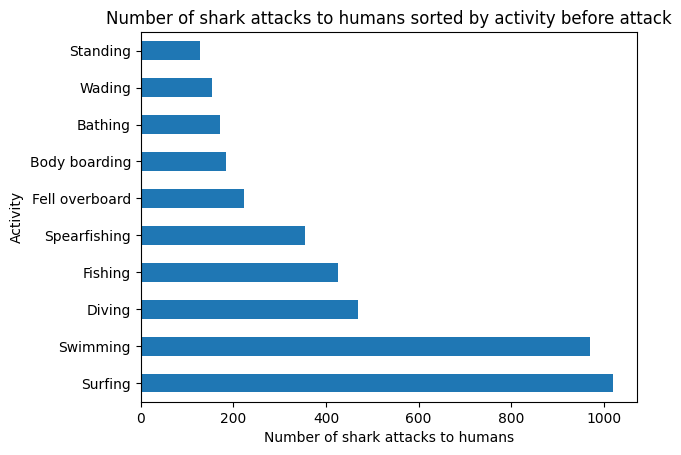

In [143]:
activity_types.plot(kind='barh')
plt.title('Number of shark attacks to humans sorted by activity before attack')
plt.xlabel('Number of shark attacks to humans')
plt.ylabel('Activity');

Answer to question 4 'Are certain activities more likely to result in a shark attack?

In the graph above one can see that some activities are definitely more likely to result in a shark attack than other activities. The 2 activities that are most likely to result in a shark attack according to the given dataset are:
1. Surfing (including windsurfing)
2. Swimming
After that follow diving, fishing and spearfishing in this given order. 

Note. The group 'fell overboard' also includes victims of disasters, e.g. a capsized boat or an air crash in the water. Note: in the cases of disasters the number of victims is rarely specified. In reality the number of shark attacks after a disaster where people end up in the water can be much bigger than registrated. 

Furthermore ons has to take into account that there are not always witnesses who can confirm the activity. When registrations happened was not taken into account. Due to new technologies that are available (internet, radar, warning systems) the graph might look different if one considers only the registrations in the last decade.  